# Libraries Versions

In [3]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib
import seaborn
import xgboost
import sys

print("Python:", sys.version)
print("Pandas:", pd.__version__)
print("NumPy:", np.__version__)
print("Scikit-learn:", sklearn.__version__)
print("Matplotlib:", matplotlib.__version__)
print("Seaborn:", seaborn.__version__)
print("XGBoost:", xgboost.__version__)

Python: 3.11.7 | packaged by Anaconda, Inc. | (main, Dec 15 2023, 18:05:47) [MSC v.1916 64 bit (AMD64)]
Pandas: 2.1.4
NumPy: 1.26.4
Scikit-learn: 1.2.2
Matplotlib: 3.8.0
Seaborn: 0.13.2
XGBoost: 2.1.1


# Importing Libraries

In [5]:
# Data manipulation
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

# Statistical analysis
from scipy.stats import zscore
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Preprocessing and modeling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import OneHotEncoder

# Regression models
import xgboost as xgb
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.svm import SVR

# Evaluation metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Suppress warnings to keep the output clean
import warnings
warnings.filterwarnings('ignore')

# Loading and Overview of the Dataset

In [7]:
# Load the training dataset from the Kaggle competition
df = pd.read_csv('train.csv')

# Display the first few rows to get an overview of the dataset structure
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [8]:
# The Id column is not required for training or visualization
df = df.drop(columns=['Id'])

In [9]:
# Check dataset dimensions (rows, columns)
print(f"Dataset shape: {df.shape}")

Dataset shape: (1460, 80)


In [10]:
# Get a concise summary of column data types and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil


--- Features with Missing values ---
              Count  Percentage (%)
PoolQC         1453       99.520548
MiscFeature    1406       96.301370
Alley          1369       93.767123
Fence          1179       80.753425
MasVnrType      872       59.726027
FireplaceQu     690       47.260274
LotFrontage     259       17.739726
GarageYrBlt      81        5.547945
GarageCond       81        5.547945
GarageType       81        5.547945
GarageFinish     81        5.547945
GarageQual       81        5.547945
BsmtExposure     38        2.602740
BsmtFinType2     38        2.602740
BsmtCond         37        2.534247
BsmtQual         37        2.534247
BsmtFinType1     37        2.534247
MasVnrArea        8        0.547945
Electrical        1        0.068493


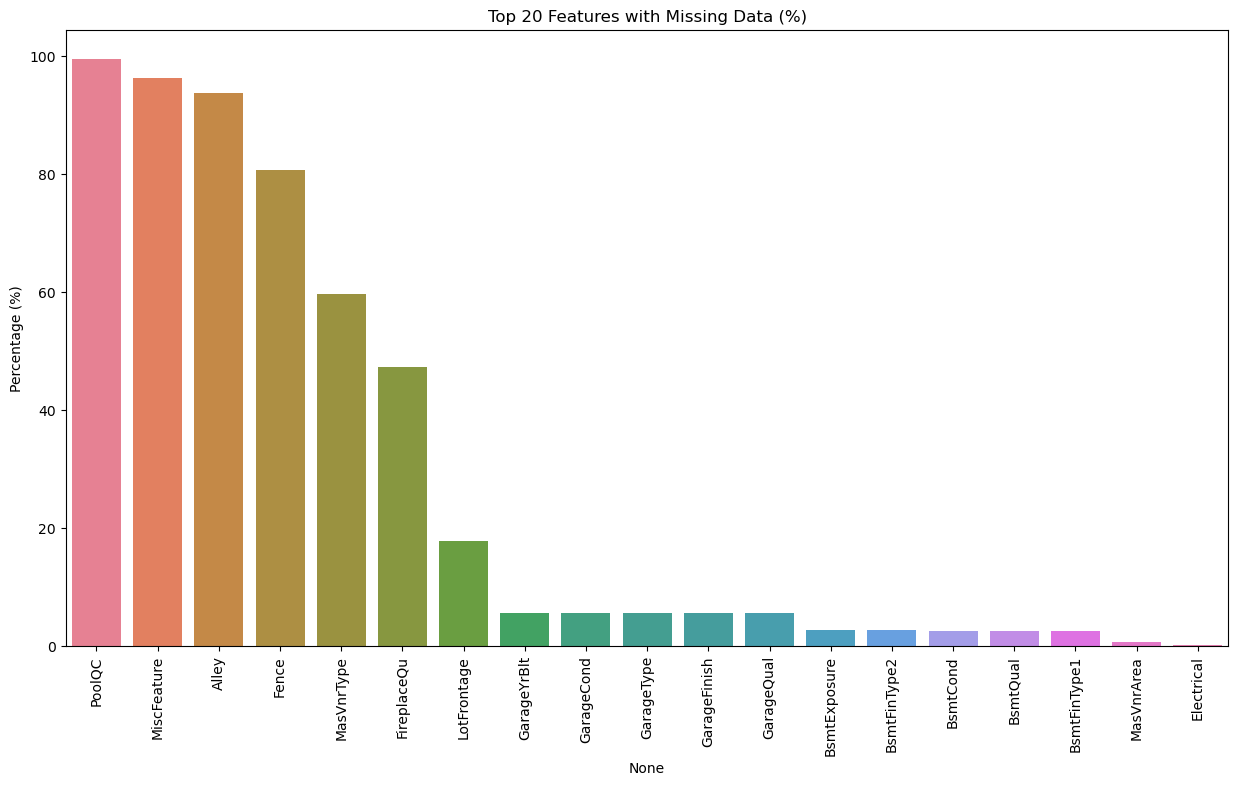

In [11]:
# Calculate and visualize the percentage of missing values per feature
missing = df.isnull().sum().sort_values(ascending=False)
missing = missing[missing > 0]
missing_perc = missing/(len(df)) * 100

missing_data = pd.DataFrame({'Count':missing, 'Percentage (%)':missing_perc})
print("\n--- Features with Missing values ---")
print(missing_data.head(20))

plt.figure(figsize=(15, 8))
sns.barplot(x=missing_data.index[:20], y=missing_data['Percentage (%)'][:20], hue=missing_data.index[:20], legend=False)
plt.title('Top 20 Features with Missing Data (%)')
plt.xticks(rotation=90)
plt.ylabel('Percentage (%)')
plt.show()

In [12]:
'''
So, here we have some columns with a lot of missing values, so we chose an certain amount that if the data has more missing than that, we will drop them
'''

'\nSo, here we have some columns with a lot of missing values, so we chose an certain amount that if the data has more missing than that, we will drop them\n'

# Preprocessing the Data

In [14]:
# Drop features with more than 80% missing values
null_threshold = 0.8
columns_lots_nulls = df.columns[df.isnull().mean() > null_threshold]
df_preprocessed = df.drop(columns=columns_lots_nulls)
print(f"Removed columns with more than 80% null values: {list(columns_lots_nulls)}")

# For the remaining features with missing values, apply appropriate imputations
# For categorical variables, fill missing with 'None' or mode
# For numerical variables, fill missing with median or mean

Removed columns with more than 80% null values: ['Alley', 'PoolQC', 'Fence', 'MiscFeature']


## Numeric

In [16]:
# Numerics with few nulls
df_preprocessed['MasVnrArea'] = df_preprocessed['MasVnrArea'].fillna(0)  # No stone cladding
df_preprocessed['GarageYrBlt'] = df_preprocessed['GarageYrBlt'].fillna(0)  # No garage
df_preprocessed['LotFrontage'] = df_preprocessed.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median())) # Front of lot

## Categorical

In [18]:
# Categorical with no meaning (e.g. no basement, no fireplace, no garage)
categoricas_none = [
    'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
    'BsmtExposure', 'BsmtFinType2', 'BsmtCond', 'BsmtQual', 'BsmtFinType1',
    'MasVnrType'
]

for col in categoricas_none:
    df_preprocessed[col] = df_preprocessed[col].fillna('None')

df_preprocessed['Electrical'] = df_preprocessed['Electrical'].fillna(df_preprocessed['Electrical'].mode()[0])

In [19]:
# Mapping ordinal categorical variables to numerical values
# These features represent ordered quality assessments (e.g., Excellent > Good > Typical > Fair > Poor)
# Converting them into integers allows models to capture the relative ranking between categories
# 'None' is mapped to -1 to indicate absence of the feature

ordinal_mappings = {"Ex": 5, "Gd": 4, "TA": 3, "Fa": 2, "Po": 1, "None": -1}

ordinal_cols = ["ExterQual", "ExterCond", "BsmtQual", "BsmtCond", "HeatingQC", 
                "KitchenQual", "FireplaceQu", "GarageQual", "GarageCond"]

for col in ordinal_cols:
    df_preprocessed[col] = df_preprocessed[col].map(ordinal_mappings)

In [20]:
ordinal_cat_cols = ["BsmtExposure", "BsmtFinType1", "BsmtFinType2", "GarageFinish", "PavedDrive"]

# Define mappings for ordinal categorical features
# These features have an inherent order that should be preserved when encoded numerically

bsmt_exposure_mapping = {"No": 0, "Mn": 1,  "Av": 2, "Gd": 3, "None": -1}

bsmt_fin_mapping = { "Unf": 0, "LwQ": 1, "Rec": 2, "BLQ": 3, "ALQ": 4, "GLQ": 5, "None": -1}

garage_finish_mapping = { "Unf": 0, "RFn": 1, "Fin": 2, "None": -1}

paved_drive_mapping = { "N": 0, "P": 1, "Y": 2}

# Apply the mappings to the corresponding columns
df_preprocessed["BsmtExposure"] = df_preprocessed["BsmtExposure"].map(bsmt_exposure_mapping)
df_preprocessed["BsmtFinType1"] = df_preprocessed["BsmtFinType1"].map(bsmt_fin_mapping)
df_preprocessed["BsmtFinType2"] = df_preprocessed["BsmtFinType2"].map(bsmt_fin_mapping)
df_preprocessed["GarageFinish"] = df_preprocessed["GarageFinish"].map(garage_finish_mapping)
df_preprocessed["PavedDrive"] = df_preprocessed["PavedDrive"].map(paved_drive_mapping)

In [21]:
# Define nominal (non-ordinal) categorical features
# These columns do not have a meaningful order and are best handled with one-hot encoding
nominal_cols = [
    "MSZoning", "Street", "LotShape", "LandContour", "Utilities", "LotConfig", 
    "LandSlope", "Neighborhood", "Condition1", "Condition2", "BldgType", 
    "HouseStyle", "RoofStyle", "RoofMatl", "Exterior1st", "Exterior2nd", 
    "MasVnrType", "Foundation", "Heating", "CentralAir", "Electrical", 
    "Functional", "GarageType", "SaleType", "SaleCondition"
]

# Initialize OneHotEncoder
ohe = OneHotEncoder(drop="first", sparse_output=False, dtype=int, handle_unknown='ignore')

# Apply one-hot encoding on the nominal columns
encoded_array = ohe.fit_transform(df_preprocessed[nominal_cols])

# Retrieve feature names created by the encoder
encoded_feature_names = ohe.get_feature_names_out(nominal_cols)

# Convert encoded array to a DataFrame with appropriate column names and same index
encoded_df = pd.DataFrame(encoded_array, columns=encoded_feature_names, index=df_preprocessed.index)

# Drop original nominal columns and concatenate the new encoded DataFrame
df_preprocessed = df_preprocessed.drop(columns=nominal_cols)
df_preprocessed = pd.concat([df_preprocessed, encoded_df], axis=1)

df_preprocessed.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,4,3,...,0,0,0,0,1,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,3,3,...,0,0,0,0,1,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,4,3,...,0,0,0,0,1,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,3,3,...,0,0,0,0,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,4,3,...,0,0,0,0,1,0,0,0,1,0


# Visualizing the Dataset

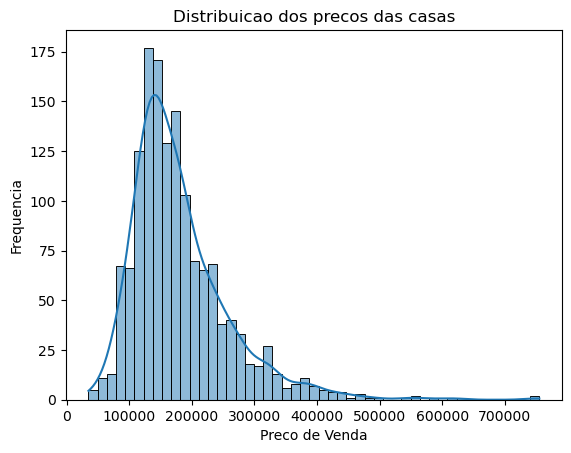

In [23]:
sns.histplot(df_preprocessed["SalePrice"], kde=True)
plt.xlabel("Preco de Venda")
plt.ylabel("Frequencia")
plt.title("Distribuicao dos precos das casas")
plt.show()

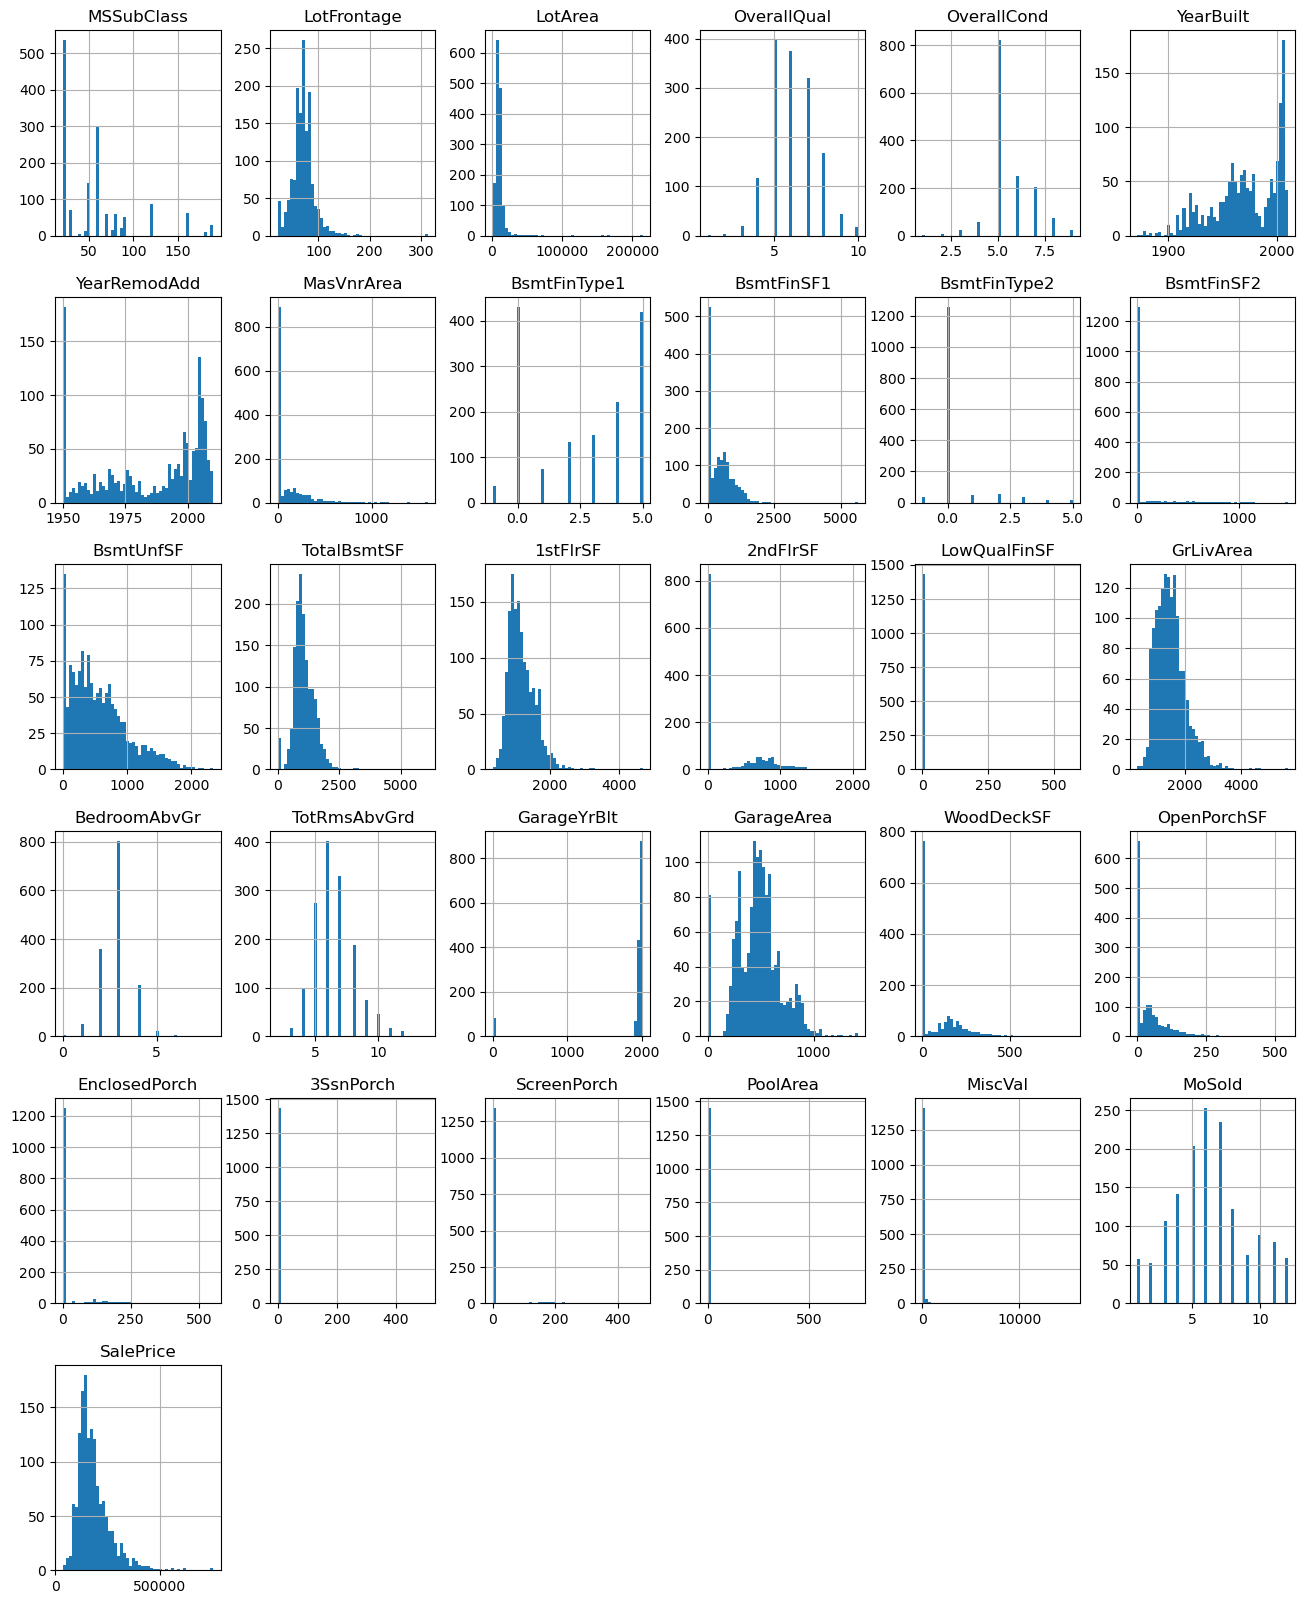

In [24]:
# Identify numerical features based on cardinality (number of unique values)
# We'll consider features with more than 6 unique values as numeric
numeric = []

for col in df_preprocessed.columns:
    if len(df_preprocessed[col].unique()) > 6:
        numeric.append(col)

# Plot histograms for each numeric feature
# This helps visualize the distribution of values in each column
df_preprocessed[numeric].hist(figsize=(16, 20), bins=50, xlabelsize=10, ylabelsize=10);

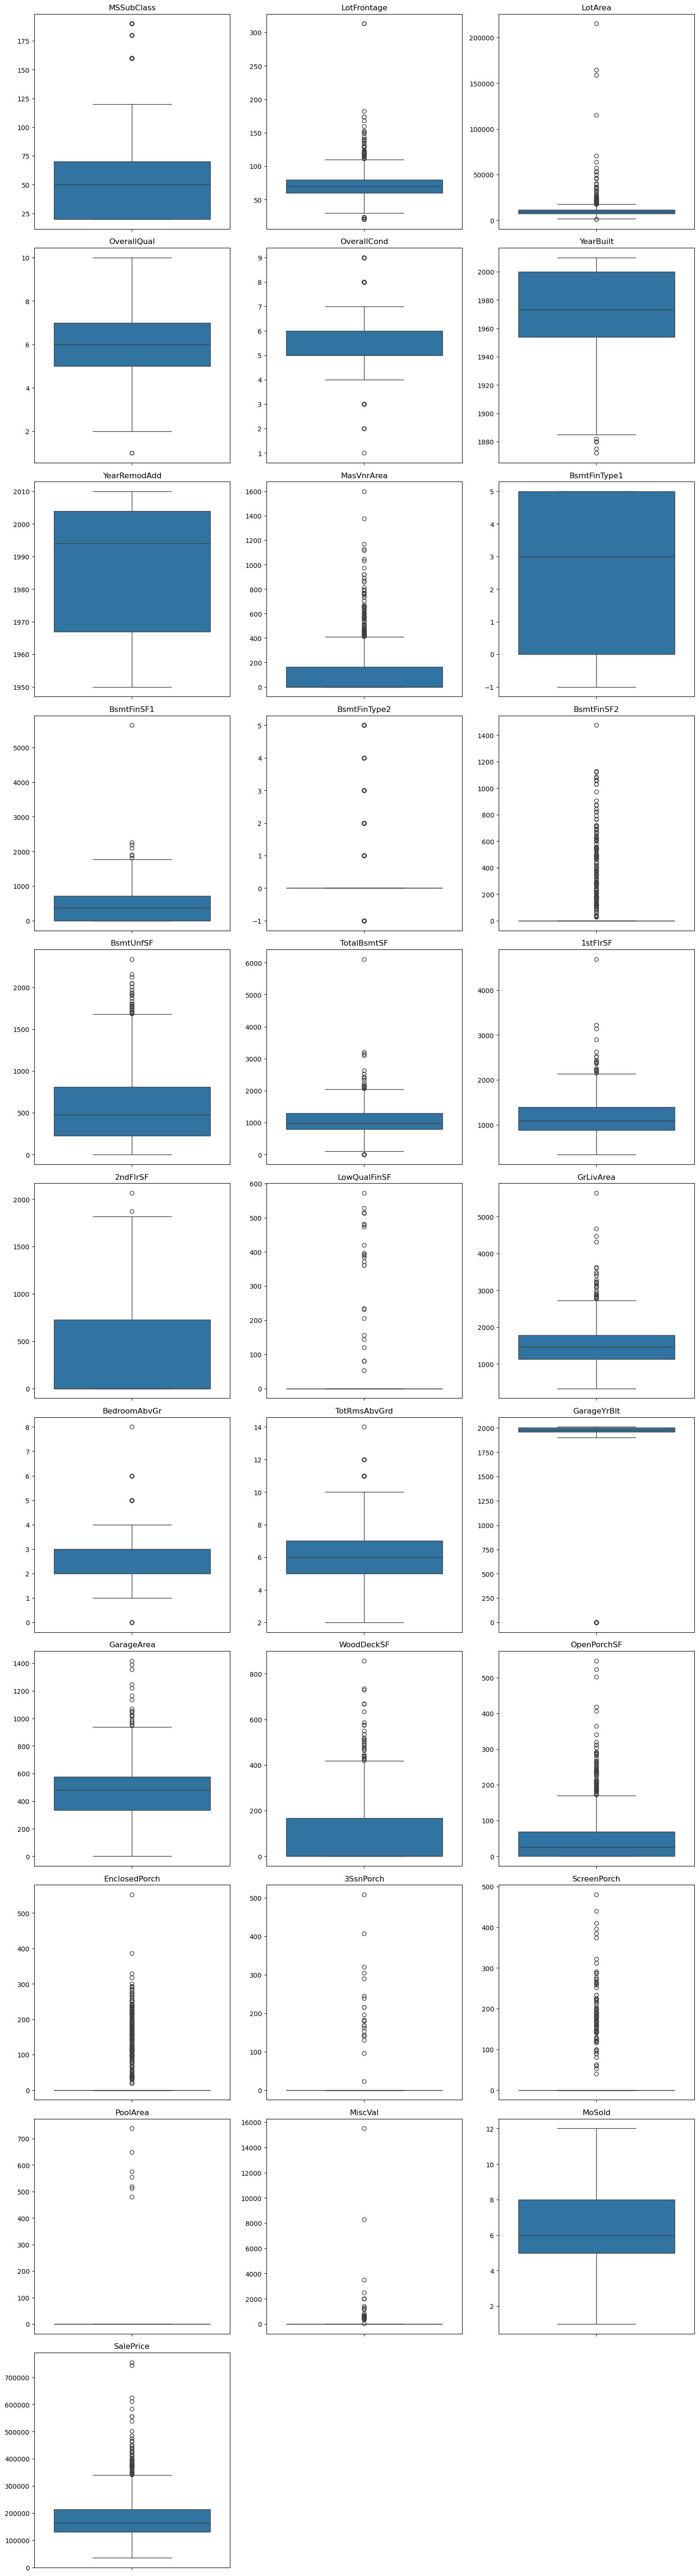

In [25]:
# Determine the number of numeric columns to plot
num_cols = len(numeric)  # Only use the numeric columns identified earlier

# Define layout: 3 plots per row
cols_per_row = 3
num_rows = int(np.ceil(num_cols / cols_per_row))  # Total number of rows needed

# Create subplots grid
fig, axes = plt.subplots(num_rows, cols_per_row, figsize=(15, num_rows * 5))
axes = axes.flatten()  # Flatten the 2D array of axes for easy iteration

# Generate boxplots for each numeric column
for i, col in enumerate(numeric):
    sns.boxplot(y=df_preprocessed[col], ax=axes[i])
    axes[i].set_title(col)   # Set title as column name
    axes[i].set_ylabel("")   # Optional: remove y-axis label for clarity

# Hide any unused subplots if total axes > columns plotted
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])  # Remove unused axes

# Improve spacing between plots
plt.tight_layout()
plt.show()

# Checking for outliers

In [27]:
# Create a DataFrame to store outlier statistics for each numeric feature
outlier_metrics = pd.DataFrame(columns=["Feature", "Qtt Outliers", "Larger Outlier", "Z-Score"])

# Loop through each numeric column to detect outliers using IQR method
for col in numeric:
    # Calculate Q1, Q3, and IQR
    Q1 = df_preprocessed[col].quantile(0.25)
    Q3 = df_preprocessed[col].quantile(0.75)
    IQR = Q3 - Q1
    upper_bound = Q3 + 1.5 * IQR  # Outlier threshold

    # Identify values above the upper bound (potential outliers)
    outliers = df_preprocessed[df_preprocessed[col] > upper_bound][col]

    # If there are outliers, calculate details for the most extreme one
    if not outliers.empty:
        max_outlier = outliers.max()

        # Compute Z-score for the max outlier
        col_zscores = zscore(df_preprocessed[col])
        max_zscore = col_zscores[df_preprocessed[col] == max_outlier].max()

        # Append metrics to the result DataFrame
        outlier_metrics = pd.concat(
            [outlier_metrics, pd.DataFrame([{
                "Feature": col,
                "Qtt Outliers": len(outliers),
                "Larger Outlier": max_outlier,
                "Z-Score": max_zscore
            }])],
            ignore_index=True
        )

# Sort the features by Z-Score in descending order
outlier_metrics = outlier_metrics.sort_values(by="Z-Score", ascending=False)

# Display outlier analysis results
print(outlier_metrics)

          Feature Qtt Outliers Larger Outlier    Z-Score
23        MiscVal           52          15500  31.165268
2         LotArea           67         215245  20.518273
22       PoolArea            7            738  18.306180
20      3SsnPorch           24            508  17.217233
12   LowQualFinSF           26            572  11.647749
9     TotalBsmtSF           24           6110  11.520949
5      BsmtFinSF1            7           5644  11.405753
1     LotFrontage           47          313.0  10.827594
10       1stFlrSF           20           4692   9.132681
7      BsmtFinSF2          167           1474   8.851638
19  EnclosedPorch          208            552   8.675309
21    ScreenPorch          116            480   8.341462
4      MasVnrArea           98         1600.0   8.285201
13      GrLivArea           31           5642   7.855574
18    OpenPorchSF           77            547   7.554198
24      SalePrice           61         755000   7.228819
14   BedroomAbvGr           29 

In [28]:
# We use a very high z-score threshold (10) to only remove extreme anomalies without affecting valid data points

# 1. Remove numerical outliers using z-score > 10
numeric_cols = df_preprocessed.select_dtypes(include=['int64', 'float64']).columns
z_scores = np.abs(zscore(df_preprocessed[numeric_cols]))

# Show how many rows will be removed
rows_to_remove = (z_scores > 10).any(axis=1).sum()
print(f"Removing {rows_to_remove} rows with z-score > 10")

# Filter them out
df_preprocessed = df_preprocessed[~(z_scores > 10).any(axis=1)]

# 2. Remove categorical/encoded features with >99% identical values
dominance_threshold = 0.995
low_variance_cols = []

for col in df_preprocessed.columns:
    top_freq = df_preprocessed[col].value_counts(normalize=True, dropna=False).values[0]
    if top_freq >= dominance_threshold:
        low_variance_cols.append(col)

df_preprocessed.drop(columns=low_variance_cols, inplace=True)

print(f"Dropped columns due to low variance: {low_variance_cols}")
print(f"Remaining dataset shape: {df_preprocessed.shape}")

Removing 23 rows with z-score > 10
Dropped columns due to low variance: ['PoolArea', 'Street_Pave', 'Utilities_NoSeWa', 'LotConfig_FR3', 'Neighborhood_Blueste', 'Condition1_PosA', 'Condition1_RRNe', 'Condition1_RRNn', 'Condition2_Feedr', 'Condition2_PosA', 'Condition2_PosN', 'Condition2_RRAe', 'Condition2_RRAn', 'Condition2_RRNn', 'HouseStyle_2.5Fin', 'RoofStyle_Mansard', 'RoofStyle_Shed', 'RoofMatl_Membran', 'RoofMatl_Metal', 'RoofMatl_Roll', 'RoofMatl_WdShake', 'RoofMatl_WdShngl', 'Exterior1st_AsphShn', 'Exterior1st_BrkComm', 'Exterior1st_CBlock', 'Exterior1st_ImStucc', 'Exterior1st_Stone', 'Exterior2nd_AsphShn', 'Exterior2nd_Brk Cmn', 'Exterior2nd_CBlock', 'Exterior2nd_Other', 'Exterior2nd_Stone', 'Foundation_Stone', 'Foundation_Wood', 'Heating_Grav', 'Heating_OthW', 'Heating_Wall', 'Electrical_FuseP', 'Electrical_Mix', 'Functional_Maj2', 'Functional_Sev', 'SaleType_CWD', 'SaleType_Con', 'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_Oth', 'SaleCondition_AdjLand']
Remaining dataset s

# Checking the Correlation

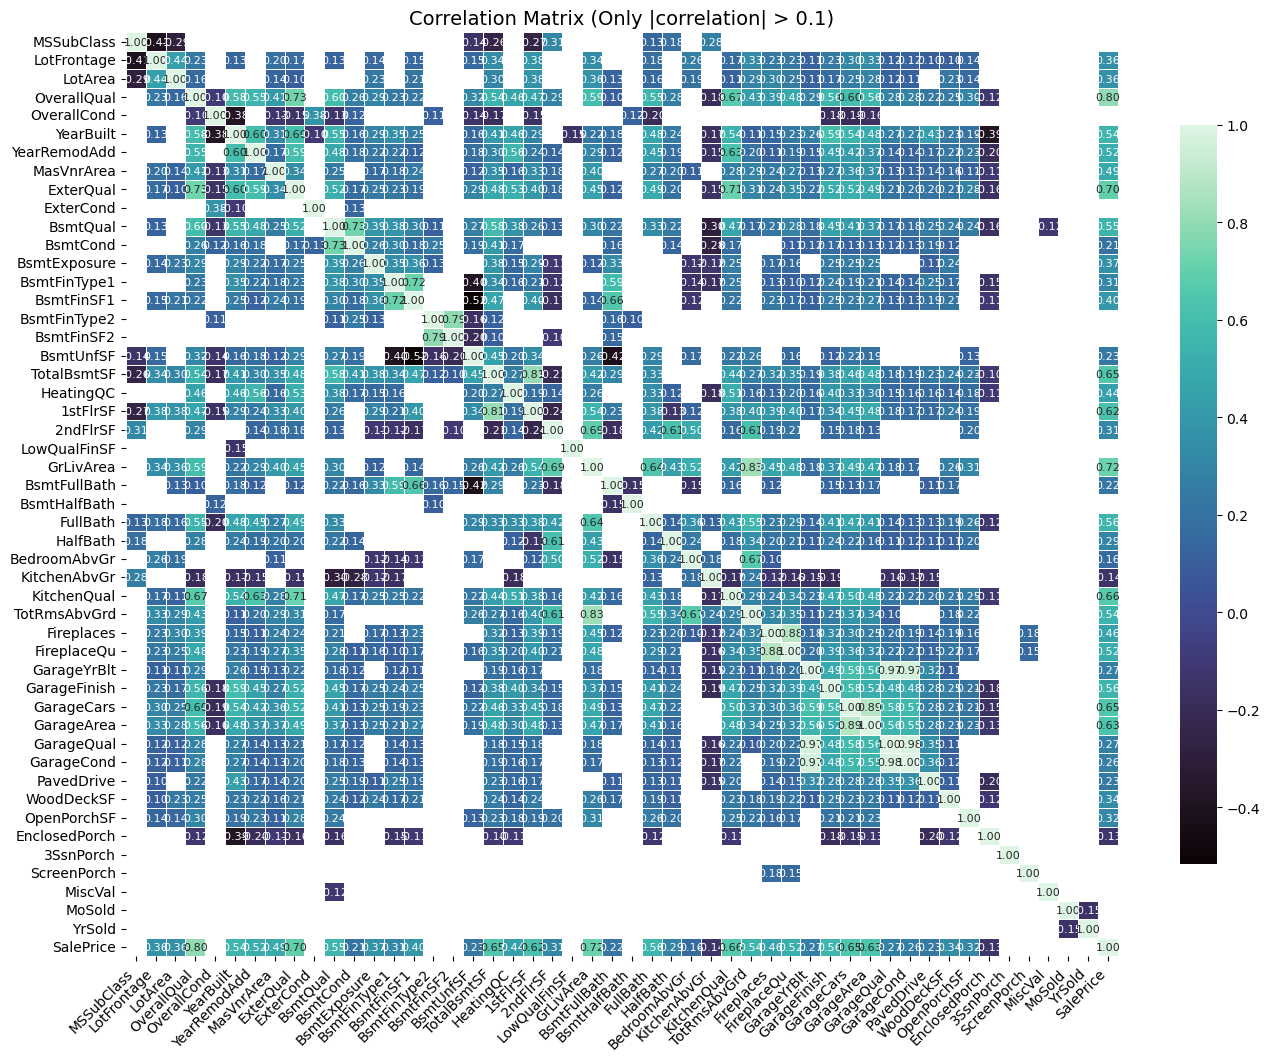

In [30]:
# Select only numerical columns (integers and floats)
num_cols = df_preprocessed.select_dtypes(include=["int64", "float64"])

# Keep only columns with more than 2 unique values (avoid binary features)
num_cols = [col for col in num_cols if df_preprocessed[col].nunique() > 2]

# Compute the correlation matrix
corr_matrix = df_preprocessed[num_cols].corr()

# Create a mask to filter out correlations with low absolute value (< 0.1)
mask = np.abs(corr_matrix) < 0.1
corr_matrix_filtered = corr_matrix.mask(mask)

# Set up the plot
plt.figure(figsize=(16, 12))

# Plot the filtered correlation matrix as a heatmap
sns.heatmap(corr_matrix_filtered, annot=True, fmt=".2f", cmap="mako", linewidths=0.5, annot_kws={"size": 8}, xticklabels=1,  yticklabels=1, cbar_kws={'shrink': 0.8})

# Format x and y axis labels
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)

# Title
plt.title("Correlation Matrix (Only |correlation| > 0.1)", fontsize=14)

# Display the plot
plt.show()

In [31]:
corr_matrix["SalePrice"].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.796981
GrLivArea        0.720789
ExterQual        0.698903
KitchenQual      0.664233
GarageCars       0.645922
TotalBsmtSF      0.645179
GarageArea       0.634104
1stFlrSF         0.618924
GarageFinish     0.560543
FullBath         0.559501
BsmtQual         0.552001
YearBuilt        0.544285
TotRmsAbvGrd     0.539600
YearRemodAdd     0.519304
FireplaceQu      0.517423
MasVnrArea       0.491778
Fireplaces       0.459967
HeatingQC        0.439850
BsmtFinSF1       0.396667
BsmtExposure     0.370488
LotArea          0.364549
LotFrontage      0.362513
WoodDeckSF       0.336156
OpenPorchSF      0.316119
BsmtFinType1     0.307758
2ndFlrSF         0.306961
HalfBath         0.291564
GarageQual       0.265632
GarageYrBlt      0.265057
GarageCond       0.261968
PavedDrive       0.234799
BsmtUnfSF        0.226783
BsmtFullBath     0.223473
BsmtCond         0.208462
BedroomAbvGr     0.161726
ScreenPorch      0.098199
MoSold           0.044061
3SsnPorch   

# Preparing the Data

In [48]:
# Splitting Data into Features and Target

X = df_preprocessed.drop("SalePrice", axis=1)
y = df_preprocessed["SalePrice"]

# Train-Test Split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling using StandardScaler

scaler = StandardScaler()

# Fit on training data and transform both training and test sets
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

trained_columns = X_train.columns.tolist()

print("Shape of scaled training data:", X_train_scaled.shape)
print("Shape of scaled test data:", X_test_scaled.shape)

Shape of scaled training data: (1149, 155)
Shape of scaled test data: (288, 155)


# Training Different Models

In [35]:
k_folds = 5

cv_results = {}

models = {
    "Linear Regression" : LinearRegression(),
    "Ridge Regression" : Ridge(alpha=1.0),
    "Lasso Regression" : Lasso(alpha=0.01),
    "ElasticNet Regression" : ElasticNet(alpha=0.01),
    "Random Forest Regressor" : RandomForestRegressor(max_depth=10),
    "Extra Trees Regressor" : ExtraTreesRegressor(n_estimators=100, random_state=42),
    "SVR" : SVR(kernel='rbf'),
    "XGBoost Regressor" : xgb.XGBRegressor(n_estimators=100, random_state=42),
}


for name, model in models.items():
    print(f"Training {name} with {k_folds}-Fold Cross Validation ...")

    scores = cross_val_score(model, X_train_scaled, y_train, cv=k_folds, scoring="neg_root_mean_squared_error")

    mean_rmse = np.abs(scores.mean())

    cv_results[name] = mean_rmse


sorted_results = sorted(cv_results.items(), key = lambda x: x[1])
for name, rmse in sorted_results:
    print(f"{name} : mean RMSE = {rmse:.4f}")

Training Linear Regression with 5-Fold Cross Validation ...
Training Ridge Regression with 5-Fold Cross Validation ...
Training Lasso Regression with 5-Fold Cross Validation ...
Training ElasticNet Regression with 5-Fold Cross Validation ...
Training Random Forest Regressor with 5-Fold Cross Validation ...
Training Extra Trees Regressor with 5-Fold Cross Validation ...
Training SVR with 5-Fold Cross Validation ...
Training XGBoost Regressor with 5-Fold Cross Validation ...
Extra Trees Regressor : mean RMSE = 28495.2291
Random Forest Regressor : mean RMSE = 29750.7948
XGBoost Regressor : mean RMSE = 30721.6683
ElasticNet Regression : mean RMSE = 31081.7381
Ridge Regression : mean RMSE = 31292.0570
Linear Regression : mean RMSE = 31362.5105
Lasso Regression : mean RMSE = 31389.4532
SVR : mean RMSE = 81136.1284


## Analyzing performance with other metrics

In [37]:
def evaluate_models(models, X_train, X_test, y_train, y_test):
    """
    Evaluates a dictionary of trained models and displays performance metrics.
    
    Parameters:
        - models: dictionary {model_name: model_object}
        - X_train, X_test: training and testing data (features)
        - y_train, y_test: training and testing target variables
    
    Returns:
        - results: dictionary with the metrics of each model
    """
    results = {}

    for name, model in models.items():
        print(f"Evaluating {name}...")

        model.fit(X_train, y_train)

        y_pred = model.predict(X_test)

        rmse = mean_squared_error(y_test, y_pred, squared=False)
        mae = mean_absolute_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

        results[name] = {"RMSE": rmse, "MAE": mae, "R²": r2, "MAPE": mape}

    sorted_results = sorted(results.items(), key=lambda x: x[1]["RMSE"])

    print("\nResults:")
    for name, scores in sorted_results:
        print(f"{name}: RMSE = {scores['RMSE']:.2f}, MAE = {scores['MAE']:.2f}, R² = {scores['R²']:.2f}, MAPE = {scores['MAPE']:.2f}%")
    
    return results

In [38]:
evaluate_models(models, X_train_scaled, X_test_scaled, y_train, y_test)

Evaluating Linear Regression...
Evaluating Ridge Regression...
Evaluating Lasso Regression...
Evaluating ElasticNet Regression...
Evaluating Random Forest Regressor...
Evaluating Extra Trees Regressor...
Evaluating SVR...
Evaluating XGBoost Regressor...

Results:
ElasticNet Regression: RMSE = 21901.92, MAE = 15880.57, R² = 0.90, MAPE = 9.98%
Ridge Regression: RMSE = 21992.31, MAE = 15961.41, R² = 0.90, MAPE = 10.00%
Lasso Regression: RMSE = 22021.97, MAE = 15993.57, R² = 0.90, MAPE = 10.01%
Linear Regression: RMSE = 22286.59, MAE = 15983.44, R² = 0.90, MAPE = 9.98%
Random Forest Regressor: RMSE = 24190.92, MAE = 16823.57, R² = 0.88, MAPE = 10.43%
XGBoost Regressor: RMSE = 24950.54, MAE = 16390.52, R² = 0.87, MAPE = 9.79%
Extra Trees Regressor: RMSE = 26125.93, MAE = 16616.72, R² = 0.86, MAPE = 10.21%
SVR: RMSE = 70556.23, MAE = 49807.10, R² = -0.02, MAPE = 30.45%


{'Linear Regression': {'RMSE': 22286.585685782466,
  'MAE': 15983.43951180209,
  'R²': 0.8987105266855702,
  'MAPE': 9.9806429272261},
 'Ridge Regression': {'RMSE': 21992.306426170755,
  'MAE': 15961.407774244713,
  'R²': 0.9013677841435908,
  'MAPE': 9.995988665349335},
 'Lasso Regression': {'RMSE': 22021.96980814245,
  'MAE': 15993.572657615972,
  'R²': 0.9011015330116277,
  'MAPE': 10.007371580510542},
 'ElasticNet Regression': {'RMSE': 21901.92264767901,
  'MAE': 15880.570997150278,
  'R²': 0.9021768337534086,
  'MAPE': 9.98050457406272},
 'Random Forest Regressor': {'RMSE': 24190.923702168242,
  'MAE': 16823.56956195832,
  'R²': 0.8806610706242982,
  'MAPE': 10.43090832993045},
 'Extra Trees Regressor': {'RMSE': 26125.92940371924,
  'MAE': 16616.716041666667,
  'R²': 0.8608059305725058,
  'MAPE': 10.205197327739738},
 'SVR': {'RMSE': 70556.22556339612,
  'MAE': 49807.09974654338,
  'R²': -0.015191362154409305,
  'MAPE': 30.454856998808484},
 'XGBoost Regressor': {'RMSE': 24950.538

In [ ]:
param_grids = {
    "Ridge": {
        "alpha": [0.1, 1.0, 10.0, 50.0]
    },
    "Lasso": {
        "alpha": [0.0001, 0.001, 0.01, 0.1, 1.0]
    },
    "ElasticNet": {
        "alpha": [0.0001, 0.001, 0.01, 0.1, 1.0],
        "l1_ratio": [0.1, 0.5, 0.9]
    },
    "Decision Tree": {
        "max_depth": [5, 10, 20, None],
        "min_samples_split": [2, 5, 10]
    },
    "Random Forest": {
        "n_estimators": [100, 300, 500],
        "max_depth": [None, 10, 20],
        "min_samples_split": [2, 5, 10]
    },
    "Extra Trees": {
        "n_estimators": [100, 300, 500],
        "max_depth": [None, 10, 20]
    },
    "XGBoost": {
        "n_estimators": [100, 300, 500],
        "learning_rate": [0.01, 0.05, 0.1],
        "max_depth": [3, 6, 9]
    }
}

# Create dictionary of models
models = {
    "Ridge": Ridge(),
    "Lasso": Lasso(),
    "ElasticNet": ElasticNet(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Extra Trees": ExtraTreesRegressor(),
    "XGBoost": xgb.XGBRegressor()}

best_models = {}

for name, model in models.items():
    print(f"\nTuning the hyperparameters for {name}")

    grid_search = GridSearchCV(model, param_grids[name], cv=5, scoring="neg_root_mean_squared_error",
                              n_jobs=-1)

    grid_search.fit(X_train, y_train)

    best_models[name] = grid_search.best_estimator_

    print(f"Best configuration for {name}: {grid_search.best_estimator_}")


Tuning the hyperparameters for Ridge
Best configuration for Ridge: Ridge(alpha=10.0)

Tuning the hyperparameters for Lasso
Best configuration for Lasso: Lasso()

Tuning the hyperparameters for ElasticNet
Best configuration for ElasticNet: ElasticNet(alpha=0.1, l1_ratio=0.9)

Tuning the hyperparameters for Decision Tree
Best configuration for Decision Tree: DecisionTreeRegressor(min_samples_split=10)

Tuning the hyperparameters for Random Forest
Best configuration for Random Forest: RandomForestRegressor(max_depth=10)

Tuning the hyperparameters for Extra Trees
Best configuration for Extra Trees: ExtraTreesRegressor(n_estimators=300)

Tuning the hyperparameters for XGBoost
Best configuration for XGBoost: XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
            

In [40]:
evaluate_models(best_models, X_train_scaled, X_test_scaled, y_train, y_test)

Evaluating Ridge...
Evaluating Lasso...
Evaluating ElasticNet...
Evaluating Decision Tree...
Evaluating Random Forest...
Evaluating Extra Trees...
Evaluating XGBoost...

Results:
XGBoost: RMSE = 19823.30, MAE = 13677.41, R² = 0.92, MAPE = 8.51%
ElasticNet: RMSE = 21832.37, MAE = 15823.17, R² = 0.90, MAPE = 9.98%
Ridge: RMSE = 21848.67, MAE = 15835.26, R² = 0.90, MAPE = 9.98%
Lasso: RMSE = 22012.97, MAE = 15984.99, R² = 0.90, MAPE = 10.00%
Random Forest: RMSE = 23818.34, MAE = 16544.26, R² = 0.88, MAPE = 10.20%
Extra Trees: RMSE = 25045.59, MAE = 16290.24, R² = 0.87, MAPE = 10.06%
Decision Tree: RMSE = 33546.13, MAE = 24045.66, R² = 0.77, MAPE = 15.10%


{'Ridge': {'RMSE': 21848.6733283457,
  'MAE': 15835.260573053745,
  'R²': 0.9026519230739167,
  'MAPE': 9.97878544930118},
 'Lasso': {'RMSE': 22012.96900760687,
  'MAE': 15984.988943979053,
  'R²': 0.9011823598830273,
  'MAPE': 10.003093550110618},
 'ElasticNet': {'RMSE': 21832.366510932534,
  'MAE': 15823.166374980698,
  'R²': 0.9027971808566668,
  'MAPE': 9.979457143800039},
 'Decision Tree': {'RMSE': 33546.1269879162,
  'MAE': 24045.655764991185,
  'R²': 0.7705109293377754,
  'MAPE': 15.101370641565062},
 'Random Forest': {'RMSE': 23818.338497813853,
  'MAE': 16544.258368715517,
  'R²': 0.884308844179029,
  'MAPE': 10.196610105839971},
 'Extra Trees': {'RMSE': 25045.58983467812,
  'MAE': 16290.239074074074,
  'R²': 0.8720796138081288,
  'MAPE': 10.058315058103164},
 'XGBoost': {'RMSE': 19823.30136562563,
  'MAE': 13677.409369574652,
  'R²': 0.9198637158368411,
  'MAPE': 8.513941900993366}}

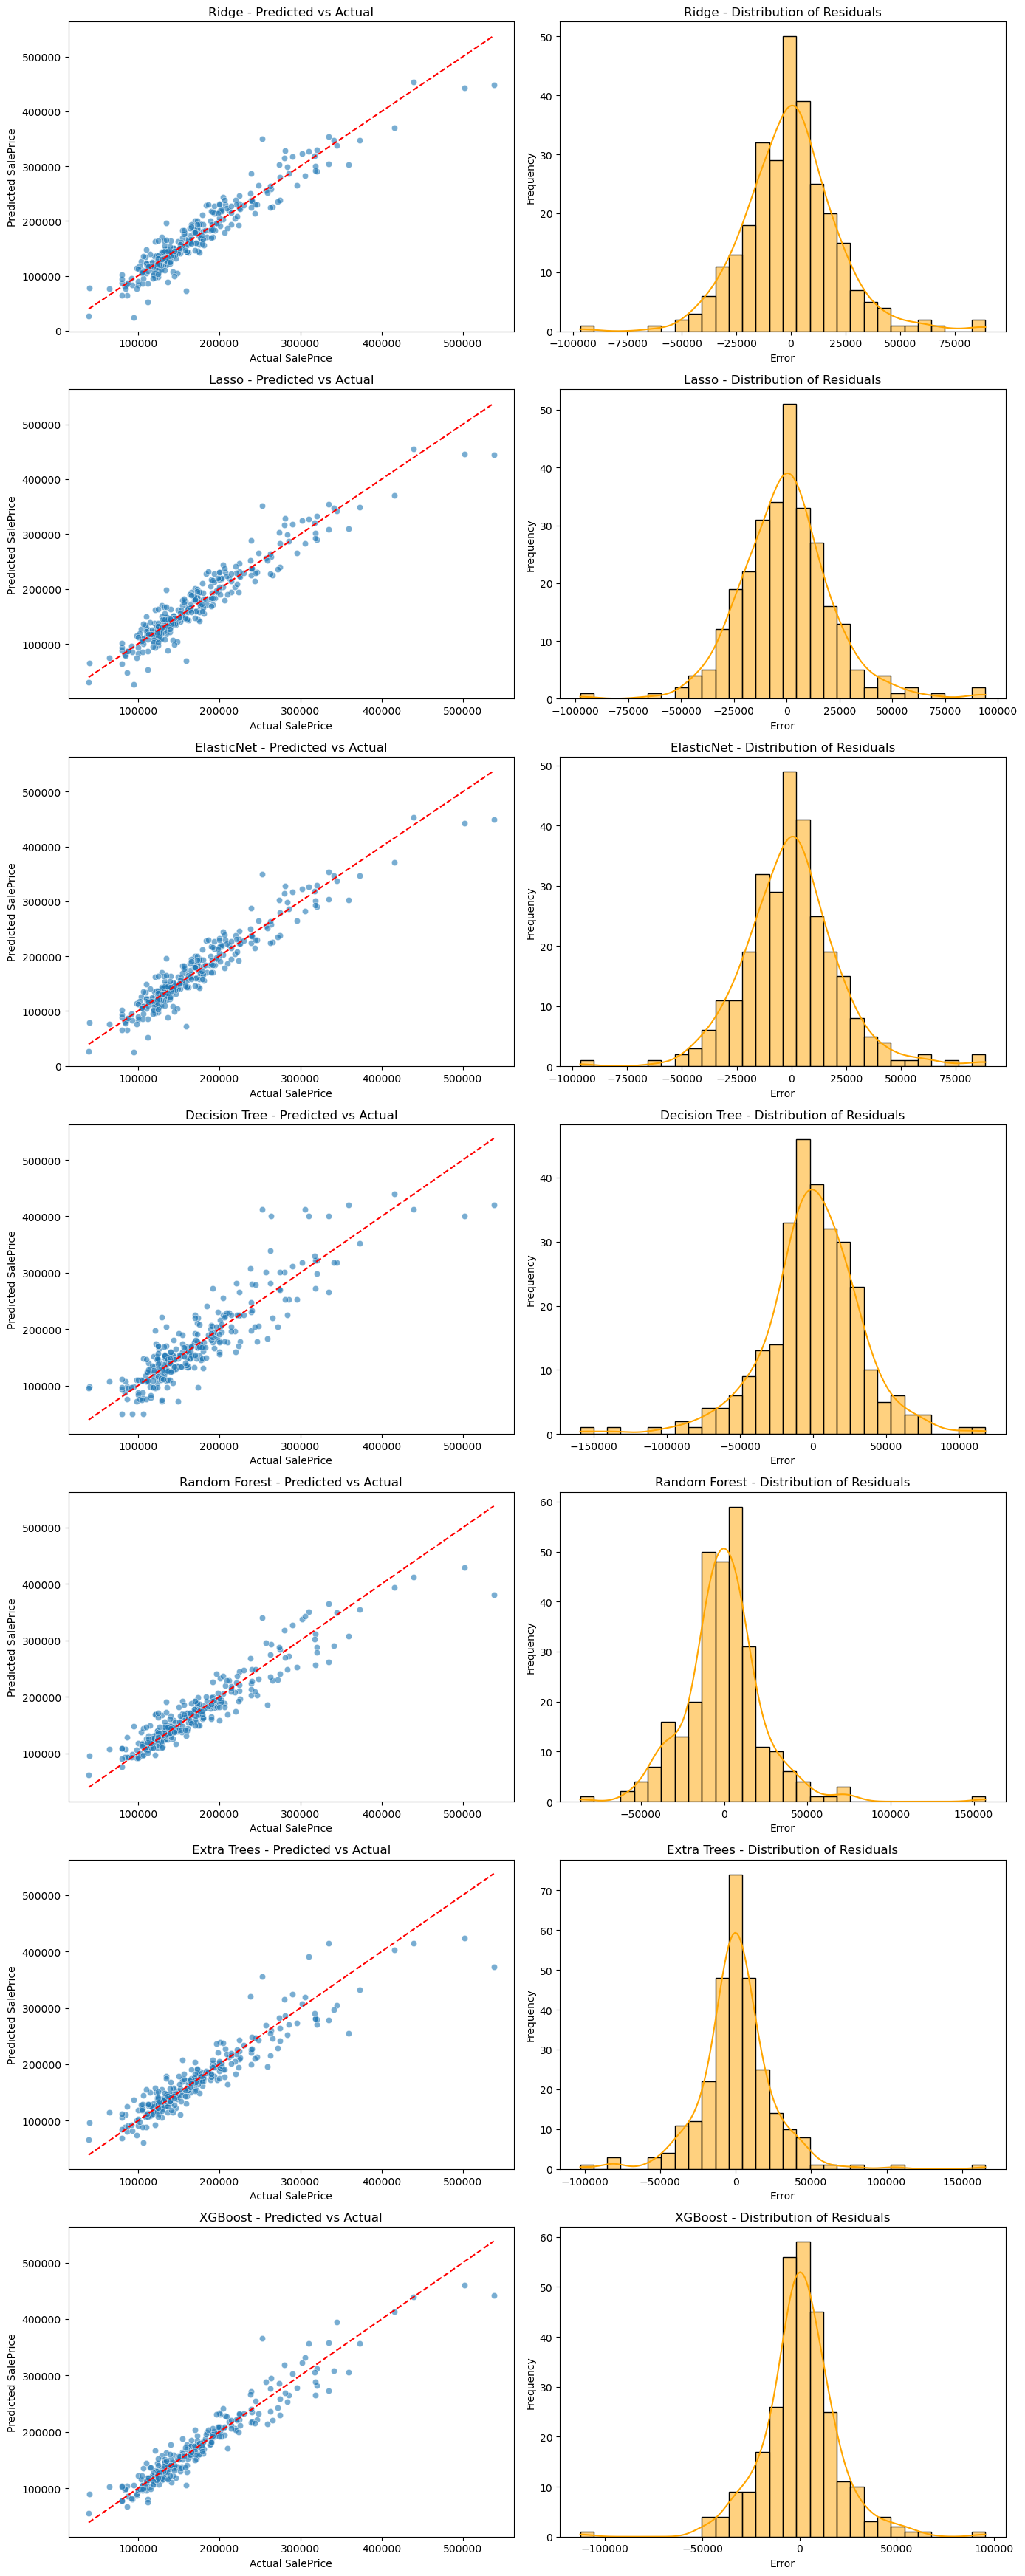

In [41]:
# Visualizing the performance of the best models

fig, axes = plt.subplots(len(best_models), 2, figsize=(14, 5 * len(best_models)))

for i, (name, model) in enumerate(best_models.items()):

    y_pred = model.predict(X_test_scaled)

    sns.scatterplot(x=y_test, y=y_pred, ax=axes[i, 0], alpha=0.6)
    axes[i, 0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    axes[i, 0].set_title(f"{name} - Predicted vs Actual")
    axes[i, 0].set_xlabel("Actual SalePrice")
    axes[i, 0].set_ylabel("Predicted SalePrice")

    residuals = y_test - y_pred
    sns.histplot(residuals, bins=30, kde=True, ax=axes[i, 1], color="orange")
    axes[i, 1].set_title(f"{name} - Distribution of Residuals")
    axes[i, 1].set_xlabel("Error")
    axes[i, 1].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

In [42]:
best_model = best_models["XGBoost"]

feature_importance = pd.DataFrame({"Feature": X_train.columns, 
                                  "Importance": best_model.feature_importances_
                                  }).sort_values(by="Importance", ascending=False)

print(feature_importance.head(15))

                  Feature  Importance
3             OverallQual    0.194964
36             GarageCars    0.151187
8               ExterQual    0.102439
35           GarageFinish    0.078780
10               BsmtQual    0.047929
23              GrLivArea    0.044522
18            TotalBsmtSF    0.034022
142     GarageType_Attchd    0.026582
33            FireplaceQu    0.025936
39             GarageCond    0.021751
30            KitchenQual    0.020842
14             BsmtFinSF1    0.015676
31           TotRmsAbvGrd    0.015166
79   Neighborhood_OldTown    0.013632
135          CentralAir_Y    0.013270


In [43]:
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

# Try different importance thresholds
for threshold in [0.01, 0.005, 0.001, 0.0005, 0.0001]:
    importance_threshold = threshold

    # Get features with importance above the threshold
    important_features = feature_importance[feature_importance["Importance"] > importance_threshold]["Feature"].tolist()

    # Filter scaled data using the selected features
    X_train_filtered = X_train_scaled_df[important_features]
    X_test_filtered = X_test_scaled_df[important_features]

    print(f"Threshold: {importance_threshold}")
    print(f"Before filtering: {X_train.shape[1]} features")
    print(f"After filtering: {X_train_filtered.shape[1]} features")

    # Evaluate models on the reduced set of features
    evaluate_models(best_models, X_train_filtered, X_test_filtered, y_train, y_test)

    print("-" * 40 + "\n" * 4)

Threshold: 0.01
Before filtering: 155 features
After filtering: 16 features
Evaluating Ridge...
Evaluating Lasso...
Evaluating ElasticNet...
Evaluating Decision Tree...
Evaluating Random Forest...
Evaluating Extra Trees...
Evaluating XGBoost...

Results:
XGBoost: RMSE = 23187.52, MAE = 16926.02, R² = 0.89, MAPE = 10.91%
Random Forest: RMSE = 24174.49, MAE = 17281.86, R² = 0.88, MAPE = 11.04%
Extra Trees: RMSE = 26392.74, MAE = 18404.35, R² = 0.86, MAPE = 11.52%
Lasso: RMSE = 27056.82, MAE = 19605.42, R² = 0.85, MAPE = 13.09%
Ridge: RMSE = 27109.20, MAE = 19614.22, R² = 0.85, MAPE = 13.10%
ElasticNet: RMSE = 27116.92, MAE = 19615.22, R² = 0.85, MAPE = 13.10%
Decision Tree: RMSE = 32387.73, MAE = 23373.37, R² = 0.79, MAPE = 14.33%
----------------------------------------




Threshold: 0.005
Before filtering: 155 features
After filtering: 24 features
Evaluating Ridge...
Evaluating Lasso...
Evaluating ElasticNet...
Evaluating Decision Tree...
Evaluating Random Forest...
Evaluating Extra T

In [44]:
# Define and train the final XGBoost model
final_xgb = xgb.XGBRegressor(
    n_estimators=500,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)

important_features = feature_importance[feature_importance["Importance"] > 0.001]["Feature"].tolist()

X_train_filtered = X_train_scaled_df[important_features]
X_test_filtered = X_test_scaled_df[important_features]

final_xgb.fit(X_train_filtered, y_train)

# Make predictions
y_pred_final = final_xgb.predict(X_test_filtered)

# Calculate evaluation metrics
final_rmse = np.sqrt(mean_squared_error(y_test, y_pred_final))
final_mae = mean_absolute_error(y_test, y_pred_final)
final_r2 = r2_score(y_test, y_pred_final)
final_mape = np.mean(np.abs((y_test - y_pred_final) / y_test)) * 100

# Print results
print("\nFinal Results of the XGBoost Model:")
print(f"RMSE: {final_rmse:.2f}")
print(f"MAE : {final_mae:.2f}")
print(f"R²  : {final_r2:.2f}")
print(f"MAPE: {final_mape:.2f}%")


Final Results of the XGBoost Model:
RMSE: 19278.06
MAE : 13267.52
R²  : 0.92
MAPE: 8.24%


# Predicting the final values

In [72]:
# Load and Clean Test Dataset

# Load the test dataset
final_data = pd.read_csv("test.csv")

# Remove irrelevant or high-NaN columns
cols_to_remove = ['Id', 'Alley', 'PoolQC', 'Fence', 'MiscFeature']
final_data = final_data.drop(columns=cols_to_remove)

# Fill numeric NaNs
final_data['MasVnrArea'] = final_data['MasVnrArea'].fillna(0)
final_data['GarageYrBlt'] = final_data['GarageYrBlt'].fillna(0)
final_data['LotFrontage'] = final_data.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

# Fill categorical NaNs with "None" (indicating no feature)
categorical_none = [
    'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
    'BsmtExposure', 'BsmtFinType2', 'BsmtCond', 'BsmtQual', 'BsmtFinType1',
    'MasVnrType'
]
for col in categorical_none:
    final_data[col] = final_data[col].fillna('None')

# Fill categorical NaNs with most frequent values (mode)
final_data['Electrical'] = final_data['Electrical'].fillna(final_data['Electrical'].mode()[0])
final_data['MSZoning'] = final_data['MSZoning'].fillna(final_data['MSZoning'].mode()[0])
final_data['Utilities'] = final_data['Utilities'].fillna('AllPub')
final_data['Exterior1st'] = final_data['Exterior1st'].fillna(final_data['Exterior1st'].mode()[0])
final_data['Exterior2nd'] = final_data['Exterior2nd'].fillna(final_data['Exterior2nd'].mode()[0])
final_data['Functional'] = final_data['Functional'].fillna('Typ')
final_data['SaleType'] = final_data['SaleType'].fillna('WD')


# Encode Ordinal and Nominal Values

# Map ordinal features to integers
ordinal_mappings = {"Ex": 5, "Gd": 4, "TA": 3, "Fa": 2, "Po": 1, "None": -1}
ordinal_cols = ["ExterQual", "ExterCond", "BsmtQual", "BsmtCond", "HeatingQC", 
                "KitchenQual", "FireplaceQu", "GarageQual", "GarageCond"]

for col in ordinal_cols:
    final_data[col] = final_data[col].map(ordinal_mappings)

# Specific mappings for ordinal categorical columns
final_data["BsmtExposure"] = final_data["BsmtExposure"].map({"No": 0, "Mn": 1,  "Av": 2, "Gd": 3, "None": -1})
bsmt_fin_mapping = {"Unf": 0, "LwQ": 1, "Rec": 2, "BLQ": 3, "ALQ": 4, "GLQ": 5, "None": -1}
final_data["BsmtFinType1"] = final_data["BsmtFinType1"].map(bsmt_fin_mapping)
final_data["BsmtFinType2"] = final_data["BsmtFinType2"].map(bsmt_fin_mapping)
final_data["GarageFinish"] = final_data["GarageFinish"].map({"Unf": 0, "RFn": 1, "Fin": 2, "None": -1})
final_data["PavedDrive"] = final_data["PavedDrive"].map({"N": 0, "P": 1, "Y": 2})


# One-Hot Encode Nominals

nominal_cols = [
    "MSZoning", "Street", "LotShape", "LandContour", "Utilities", "LotConfig", 
    "LandSlope", "Neighborhood", "Condition1", "Condition2", "BldgType", 
    "HouseStyle", "RoofStyle", "RoofMatl", "Exterior1st", "Exterior2nd", 
    "MasVnrType", "Foundation", "Heating", "CentralAir", "Electrical", 
    "Functional", "GarageType", "SaleType", "SaleCondition"
]

# Apply OneHotEncoder fitted during training
encoded_array = ohe.transform(final_data[nominal_cols])
encoded_feature_names = ohe.get_feature_names_out(nominal_cols)
encoded_df = pd.DataFrame(encoded_array, columns=encoded_feature_names, index=final_data.index)

# Replace original nominal columns with one-hot encoded columns
final_data = final_data.drop(columns=nominal_cols)
final_data = pd.concat([final_data, encoded_df], axis=1)


# Remove Outliers and Noise

# Identify and remove rows with extreme z-scores
numeric_cols = final_data.select_dtypes(include=['int64', 'float64']).columns
z_scores = np.abs(zscore(final_data[numeric_cols]))
rows_to_remove = (z_scores > 10).any(axis=1).sum()
print(f"Removing {rows_to_remove} rows with z-score > 10")
final_data = final_data[~(z_scores > 10).any(axis=1)]

# Remove low variance features identified during training
low_variance_cols = [ 
    # (shortened list — assume previously defined)
    'PoolArea', 'Street_Pave', 'LotConfig_FR3', 'Neighborhood_Blueste', 
    'Condition1_PosA', 'Condition1_RRNn', 'RoofStyle_Shed', 'RoofMatl_Roll', 
    'Foundation_Wood', 'Heating_Wall', 'SaleType_ConLI', 'SaleCondition_AdjLand'
]
cols_to_drop = [col for col in low_variance_cols if col in final_data.columns]
final_data.drop(columns=cols_to_drop, inplace=True)

print(f"Remaining dataset shape: {final_data.shape}")


# Prepare Data for Prediction

# Align the final test data with training columns
X_final = final_data.reindex(columns=trained_columns, fill_value=0)

# Sanity check: column alignment
if X_final.shape[1] != len(trained_columns):
    print(f"❗ Column mismatch: X_final has {X_final.shape[1]} columns, expected {len(trained_columns)}")
    print("Missing columns:", set(trained_columns) - set(X_final.columns))
    print("Extra columns:", set(X_final.columns) - set(trained_columns))

# Apply scaling using the previously fitted scaler
X_final_scaled = scaler.transform(X_final)
X_final = pd.DataFrame(X_final_scaled, columns=trained_columns, index=final_data.index)


# Select Most Important Features

# Filter only the features used during training
important_features = feature_importance[feature_importance["Importance"] > 0.001]["Feature"].tolist()
X_final = X_final[important_features]


# Final Prediction

# Make predictions using the trained model
final_predictions = final_xgb.predict(X_final)

Removing 19 rows with z-score > 10
Remaining dataset shape: (1440, 190)
